<a href="https://colab.research.google.com/github/anupkumar888/Python_Programming/blob/Python-programming/Co2_Regression_sz1ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
path="/content/drive/MyDrive/PYTHON PROGRAMMING/Colab Notebooks/Machine Learning/ML Co2_Regression/FuelConsumptionCo2_r8r5q.csv"

In [13]:
df=pd.read_csv(path)
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [15]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [17]:
df['CO2EMISSIONS'].corr(df['FUELCONSUMPTION_COMB'])

0.8921285933157567

In [18]:
df['CO2EMISSIONS'].corr(df['CYLINDERS'])

0.8496845920141155

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


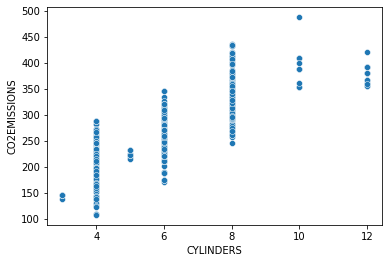

In [19]:
import seaborn as sns
sns.scatterplot(df['CYLINDERS'],df['CO2EMISSIONS'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


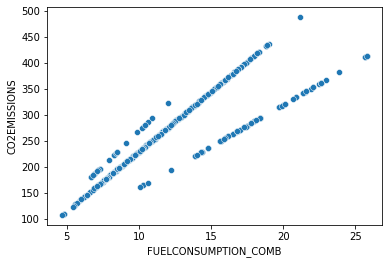

In [20]:
sns.scatterplot(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'])

In [21]:
df2=df[['FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']]

In [22]:
df2

,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,8.5,4,196
1,9.6,4,221
2,5.9,4,136
3,11.1,6,255
4,10.6,6,244
...,...,...,...
1062,11.8,6,271
1063,11.5,6,264
1064,11.8,6,271
1065,11.3,6,260


In [23]:
x=df2[['CYLINDERS','FUELCONSUMPTION_COMB']]
y=df2['CO2EMISSIONS']

In [24]:
x

,CYLINDERS,FUELCONSUMPTION_COMB
0,4,8.5
1,4,9.6
2,4,5.9
3,6,11.1
4,6,10.6
...,...,...
1062,6,11.8
1063,6,11.5
1064,6,11.8
1065,6,11.3


In [25]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [26]:
x=np.asanyarray(x)
y=np.asanyarray(y)

In [27]:

y

array([196, 221, 136, ..., 271, 260, 294])

In [28]:
x

array([[ 4. ,  8.5],
       [ 4. ,  9.6],
       [ 4. ,  5.9],
       ...,
       [ 6. , 11.8],
       [ 6. , 11.3],
       [ 6. , 12.8]])

In [29]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
x_train

array([[ 6. , 11.5],
       [ 4. ,  9.6],
       [ 8. , 25.8],
       ...,
       [ 8. , 12.6],
       [ 8. , 14.8],
       [ 4. ,  9.9]])

In [31]:
y_train

array([264, 221, 413, 235, 179, 262, 253, 258, 212, 254, 216, 196, 239,
       294, 221, 264, 285, 264, 345, 170, 179, 294, 308, 265, 239, 248,
       230, 225, 294, 285, 278, 294, 221, 228, 216, 269, 310, 212, 380,
       255, 198, 235, 147, 225, 246, 264, 216, 229, 161, 380, 200, 242,
       175, 264, 200, 184, 218, 258, 264, 264, 317, 366, 274, 382, 338,
       184, 198, 255, 260, 177, 186, 126, 269, 202, 259, 331, 212, 301,
       131, 161, 196, 360, 232, 294, 294, 235, 354, 264, 258, 354, 259,
       255, 218, 400, 207, 345, 177, 262, 342, 281, 322, 278, 264, 242,
       202, 253, 197, 184, 196, 179, 175, 297, 223, 267, 260, 281, 209,
       347, 168, 327, 294, 356, 184, 315, 346, 189, 368, 384, 207, 237,
       324, 184, 200, 225, 218, 253, 230, 235, 205, 186, 177, 225, 228,
       177, 198, 402, 184, 230, 184, 255, 200, 239, 258, 377, 242, 230,
       175, 271, 382, 179, 370, 205, 354, 251, 232, 288, 168, 198, 297,
       290, 230, 196, 363, 255, 294, 306, 294, 304, 297, 299, 26

In [32]:
y_train.shape

(853,)

In [33]:
x_train.shape

(853, 2)

In [34]:
x_test.shape

(214, 2)

In [35]:
y_test.shape

(214,)

In [36]:
x_train[0:2]

array([[ 6. , 11.5],
       [ 4. ,  9.6]])

In [37]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [38]:
clf

LinearRegression()

In [39]:
clf.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=clf.predict(x_test)

In [41]:
y_pred

array([357.42668837, 216.00957748, 193.3862405 , 185.1595725 ,
       248.1556267 , 203.66957549, 246.0989597 , 248.1556267 ,
       214.98124398, 186.187906  , 301.8966794 , 247.1272932 ,
       299.84001241, 243.0139592 , 247.1272932 , 186.187906  ,
       248.1556267 , 434.55170082, 203.66957549, 267.69396319,
       191.3295735 , 185.1595725 , 243.0139592 , 372.0910681 ,
       204.69790899, 193.3862405 , 300.8683459 , 196.47124099,
       299.84001241, 261.52396219, 364.62502286, 390.33336035,
       333.77501788, 403.20878382, 225.53228971, 269.75063019,
       312.1800144 , 205.72624249, 243.0139592 , 249.1839602 ,
       256.38229469, 274.89229768, 254.3256277 , 401.64502884,
       300.8683459 , 371.82335736, 304.9816799 , 260.49562869,
       335.83168488, 245.0706262 , 309.85563666, 181.0462385 ,
       202.64124199, 240.9572922 , 191.3295735 , 193.3862405 ,
       220.12291148, 206.75457599, 252.2689607 , 261.52396219,
       196.47124099, 237.60458097, 204.69790899, 211.89

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8694458313694005